<a href="https://colab.research.google.com/github/Abrazacs/fashion_mnist/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns

# Читаем тренировочный датасет
df_train = pd.read_csv('fmnist_train.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0,2
3,0,0,0,0,1,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [50]:
#Проверка на пропущенные значения
df_train.info()
df_train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17040 entries, 0 to 17039
Columns: 786 entries, label to Id
dtypes: float64(424), int64(362)
memory usage: 102.2 MB


,0
label,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel781,1
pixel782,1
pixel783,1
pixel784,1


In [51]:
#Заполняем пропущенные значения нулями
df_train = df_train.fillna(0)

In [53]:
# Разделяем датасет на тренировочную и тестовую выборку, преобразуем в тензор датасеты и сохраняем в DataLoader
X = df_train.drop(['label', 'Id'], axis=1).values
y = df_train['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [54]:
# Создаем нейронную сеть
pixels_qty = 28 * 28
learinig_rate = 0.001
epochs = 50
momentum = 0.9

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.bn1 = nn.BatchNorm2d(6)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.bn2 = nn.BatchNorm2d(16)
        self.fc1 = nn.Linear(4 * 4 * 16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

# Инициализируем функцию потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learinig_rate, momentum=momentum)

In [55]:
# Тренируем нейронную сеть
losses ={}

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.reshape(-1, 1, 28, 28)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')
    losses[epoch+1] = running_loss / len(trainloader)

print('Finished Training')

Epoch 1, Loss: 2.0302105179415064
Epoch 2, Loss: 1.0914981978040346
Epoch 3, Loss: 0.7157952544834693
Epoch 4, Loss: 0.6000312801817773
Epoch 5, Loss: 0.5429810460464496
Epoch 6, Loss: 0.5001024923554049
Epoch 7, Loss: 0.4707538519806705
Epoch 8, Loss: 0.4428688093949931
Epoch 9, Loss: 0.4239602547156419
Epoch 10, Loss: 0.40539589328385295
Epoch 11, Loss: 0.39314766403095264
Epoch 12, Loss: 0.38036670084570495
Epoch 13, Loss: 0.36856074967014957
Epoch 14, Loss: 0.3567605473345994
Epoch 15, Loss: 0.34984408696772346
Epoch 16, Loss: 0.33966223706661813
Epoch 17, Loss: 0.334979707926092
Epoch 18, Loss: 0.3243858069881027
Epoch 19, Loss: 0.3226218475772182
Epoch 20, Loss: 0.3124733566538269
Epoch 21, Loss: 0.3068769246059964
Epoch 22, Loss: 0.29664014682103773
Epoch 23, Loss: 0.291567131247319
Epoch 24, Loss: 0.2868160675039314
Epoch 25, Loss: 0.2843243567876413
Epoch 26, Loss: 0.2743502858449036
Epoch 27, Loss: 0.27218138965222755
Epoch 28, Loss: 0.26694193317996506
Epoch 29, Loss: 0.2630

<Axes: >

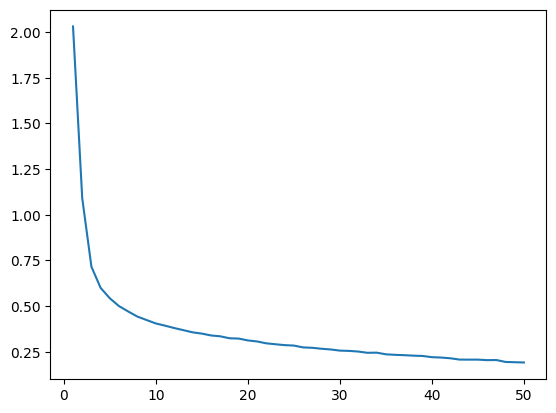

In [56]:
sns.lineplot(x=losses.keys(), y=losses.values())

In [57]:
#Считаем точность на тренировочном датасете
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.reshape(-1, 1, 28, 28)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 86 %


In [60]:
# Cчитывает тестовый датасет и делает предсказания
df_test = pd.read_csv('fmnist_test.csv')
X_test_new = df_test.drop(['Id'], axis=1).values
X_test_new = torch.FloatTensor(X_test_new)
net.eval()
with torch.no_grad():
    predictions = net(X_test_new.reshape(-1, 1, 28, 28))
    predicted_labels = torch.argmax(predictions, dim=1)

In [62]:
# Сохраняем предсказания в файл
submission_df = pd.DataFrame({'Id': df_test['Id'], 'label': predicted_labels.numpy()})
submission_df.to_csv('submission.csv', index=False)